D1. Operasi Citra Sederhana

In [9]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu
dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk
melakukan transformasi linier brightness adalah sebagai berikut:

g(𝑥,𝑦) = 𝑓(𝑥,𝑦)+ 𝑏  </br>

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b
adalah nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada
google colab:

Transformasi Linier Bigtness

mengubah tingkat kecerahan warna
--------------------------------
masukan nilai kecerahan: 50


/tmp/ipython-input-2204607504.py:12: RuntimeWarning: overflow encountered in scalar add
  brightness_img[y,x,c] = np.clip(img[y,x,c] + brightness, 0, 255)


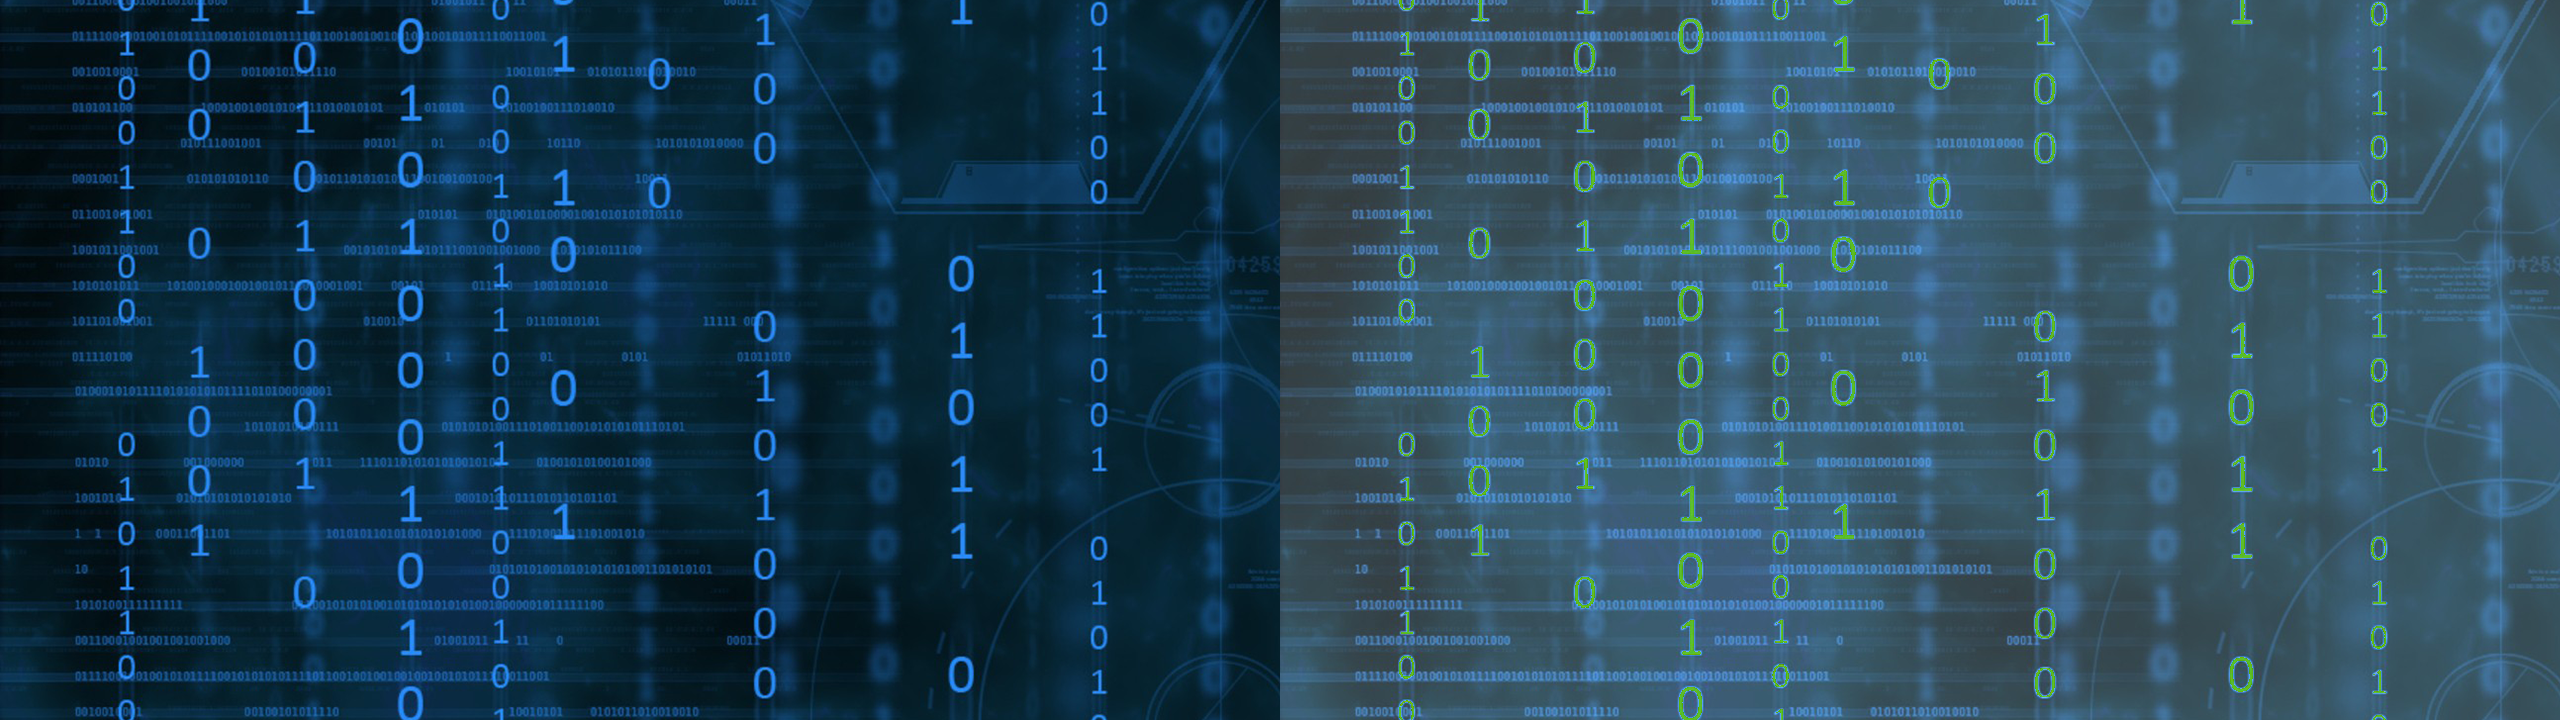

In [10]:
print('mengubah tingkat kecerahan warna')
print('--------------------------------')
try:
  brightness = int(input('masukan nilai kecerahan: '))
except ValueError:
  print('error not number: ')
img = cv2.imread('/content/drive/MyDrive/Blends Amlit_36.png')
brightness_img = np.zeros(img.shape, img.dtype)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      brightness_img[y,x,c] = np.clip(img[y,x,c] + brightness, 0, 255)
final_frame = cv2.hconcat([img, brightness_img])
cv2_imshow(final_frame)

Dari potongan kode di atas dapat dilihat bahwa ketika dijalankan, system akan
menampilkan text field untuk memasukkan konstanta nilai brightness yang diinginkan,
dan akan disimpan pada variabel brightness. Kemudian ditentukan citra pada drive yang
akan diolah dan ditampung di variabel original. Tahap selanjutnya adalah mengakses
pixel citra masukan dengan 3 perulangan. Perulangan pertama dilakukan pada shape[0]
untuk tinggi citra, perulangan kedua dilakukan pada shape[1] untuk lebar citra, dan
perulangan ketiga dilakukan pada shape[2] yang merupakan channel warna pada citra.
Setelah melakukan 3 perulangan, dilakukan transformasi linier brightness dengan cara
menambahkan nilai brightness pada citra masukan.

TUGAS PRAKTIKUM D1

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:  
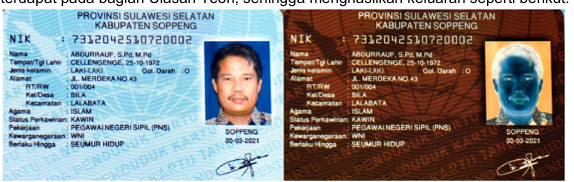

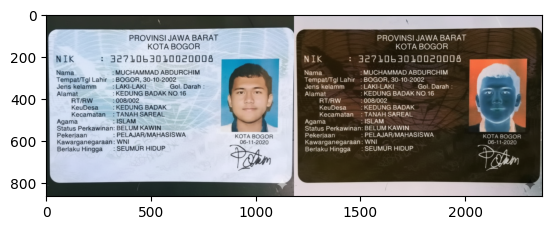

In [11]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/KTP_OHIM.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
inverse_img2 = 255 - img2
final_frame2 = cv2.hconcat([img2, inverse_img2])
plt.imshow(final_frame2)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

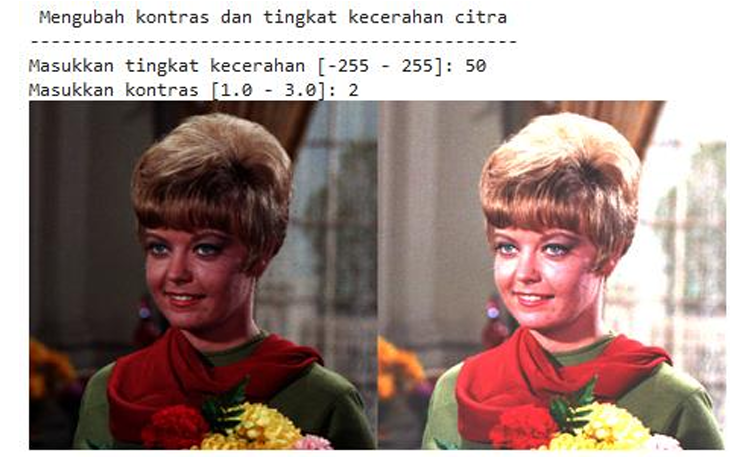

mengubah kontras dan tingkat kecerahan warna
--------------------------------
masukan nilai kontras [1.0-3.0]: 2
masukan nilai kecerahan[-255 - 255]: 50
--------------------------------


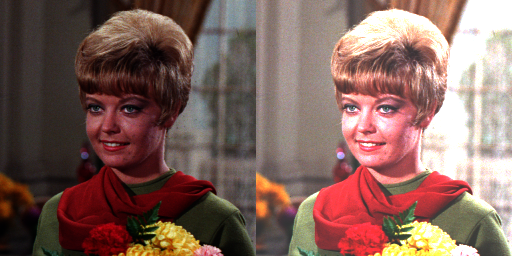

In [12]:
print('mengubah kontras dan tingkat kecerahan warna')
print('--------------------------------')
try:
  contrast = int(input('masukan nilai kontras [1.0-3.0]: '))
  brightness = int(input('masukan nilai kecerahan[-255 - 255]: '))
except ValueError:
  print('error not number: ')
print('--------------------------------')
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_img = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)
concated = cv2.hconcat([img, brightness_img])
cv2_imshow(concated)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

mengubah kontras dan tingkat kecerahan warna menggunakan transformasi log
--------------------------------
masukan nilai kecerahan[-255 - 255]: 50
--------------------------------


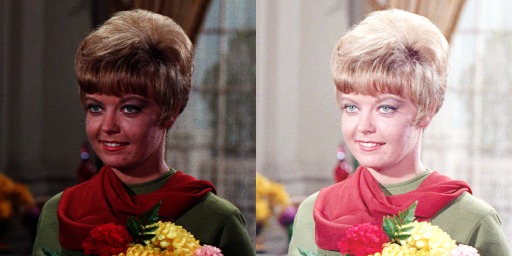

In [13]:
print('mengubah kontras dan tingkat kecerahan warna menggunakan transformasi log')
print('--------------------------------')
try:
  brightness = float(input('masukan nilai kecerahan[-255 - 255]: '))
except ValueError:
  print('error not number: ')
print('--------------------------------')
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_float = img.astype(np.float32)
log_transform = brightness * np.log(1+img_float)
log_transformed = np.uint8(np.clip(log_transform, 0, 255))
concated = cv2.hconcat([img, log_transformed])
cv2_imshow(concated)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut: </br>

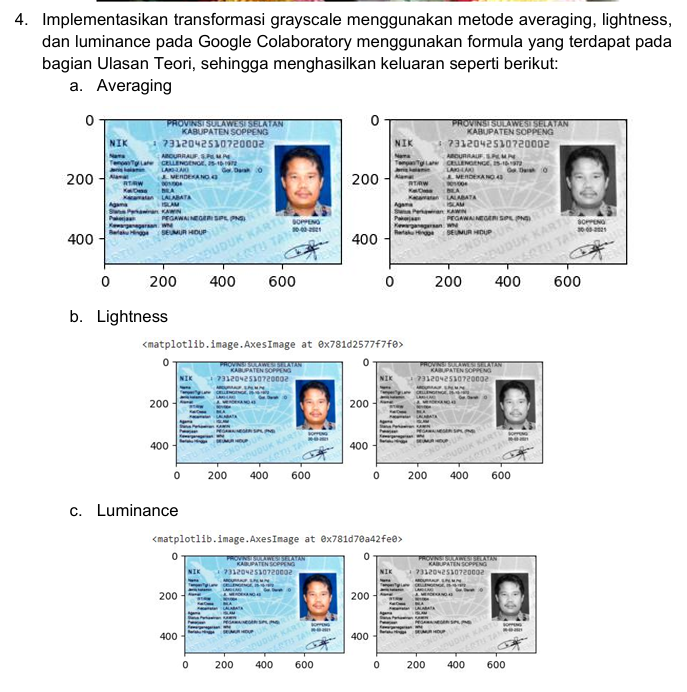

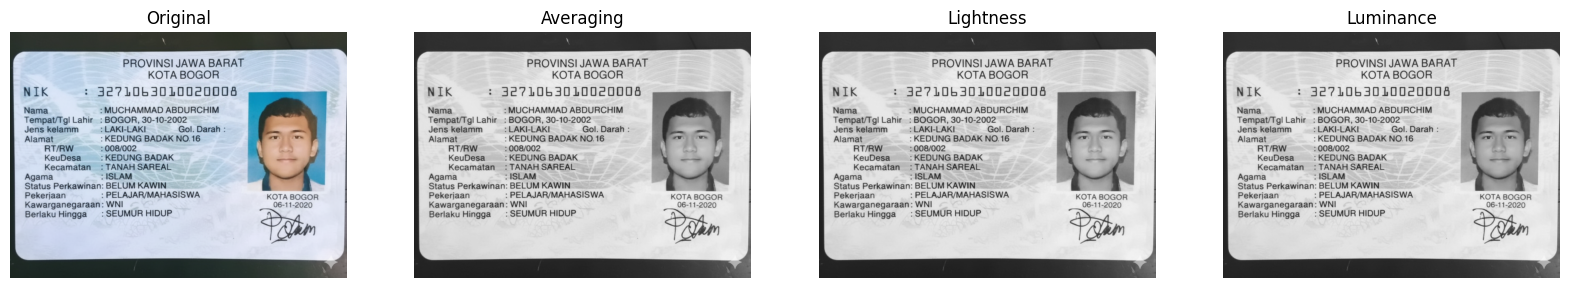

In [22]:
# Averaging
img = cv2.imread('/content/KTP_OHIM.png')

if img is None:
    print("Error: Image not found or could not be loaded.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    avg_img = (R.astype(np.float32) + G.astype(np.float32) + B.astype(np.float32)) / 3
    avg_img = avg_img.astype(np.uint8)
    avg_converted = cv2.cvtColor(avg_img, cv2.COLOR_GRAY2RGB)

    # Lightness
    # Note: The original lightness implementation in the notebook seemed to be
    # applying a linear brightness transformation, not lightness grayscale.
    # I will implement the standard lightness grayscale formula: (max(R,G,B) + min(R,G,B)) / 2

    # Calculate max and min of R, G, B for each pixel
    max_rgb = np.maximum.reduce([R, G, B])
    min_rgb = np.minimum.reduce([R, G, B])
    lightness_img = ((max_rgb.astype(np.float32) + min_rgb.astype(np.float32)) / 2).astype(np.uint8)
    lightness_converted = cv2.cvtColor(lightness_img, cv2.COLOR_GRAY2RGB)

    # Luminance
    luminance_img = (0.299 * R.astype(np.float32) + 0.587 * G.astype(np.float32) + 0.114 * B.astype(np.float32)).astype(np.uint8)
    luminance_converted = cv2.cvtColor(luminance_img, cv2.COLOR_GRAY2RGB)


    # Display all four images
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(avg_converted)
    plt.title("Averaging")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(lightness_converted)
    plt.title("Lightness")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(luminance_converted)
    plt.title("Luminance")
    plt.axis("off")

    plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:
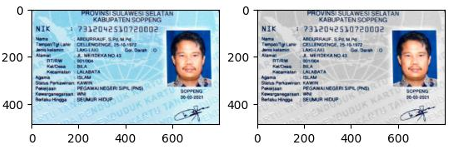

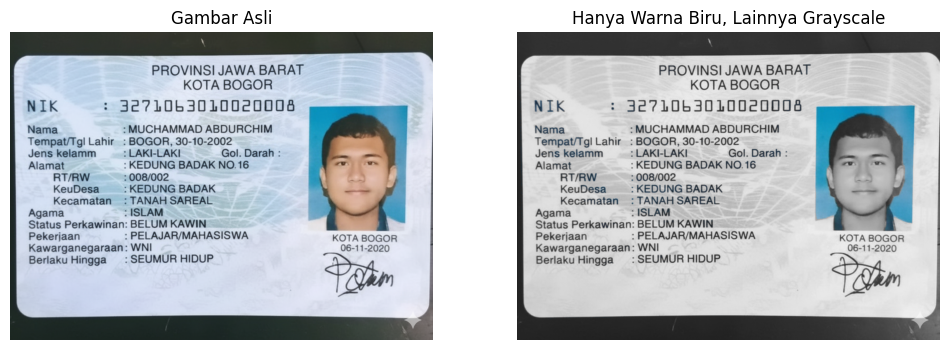

In [24]:
img = cv2.imread('/content/KTP_OHIM.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# === Fungsi Grayscale (Luminance) ===
def grayscale_luminance(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    gray = (0.21*R + 0.72*G + 0.07*B).astype(np.uint8)
    return gray

# === Fungsi: Pertahankan warna tertentu, ubah sisanya grayscale ===
def keep_color_make_others_gray(img, lower_hsv, upper_hsv):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

    # Warna asli di area mask
    color_only = cv2.bitwise_and(img, img, mask=mask)

    # Ubah seluruh gambar jadi grayscale
    gray = grayscale_luminance(img)
    gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

    # Area selain mask jadi grayscale
    inv_mask = cv2.bitwise_not(mask)
    bg = cv2.bitwise_and(gray_rgb, gray_rgb, mask=inv_mask)

    # Gabungkan hasil
    result = cv2.add(color_only, bg)
    return result

# === Range warna biru (HSV) ===
lower_blue = np.array([90, 80, 50])   # H, S, V
upper_blue = np.array([130, 255, 255])

# Proses: hanya tampilkan biru
blue_only = keep_color_make_others_gray(img, lower_blue, upper_blue)

# === Tampilkan hasil ===
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blue_only)
plt.title("Hanya Warna Biru, Lainnya Grayscale")
plt.axis("off")

plt.show()

D2. Operasi Aritmatika dan Logika

1. Buat Gamma Correction sesuai dengan petunjuk berikut

gamma correction citra
Masukan nilai input: 3


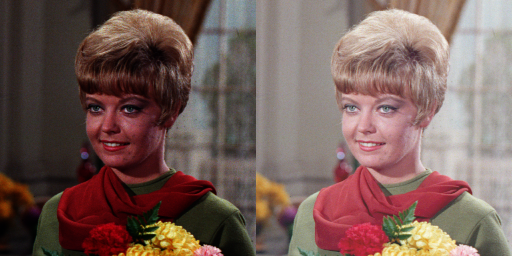

In [25]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

print('gamma correction citra')
print('======================')
try:
  gamma = int(input('Masukan nilai input: '))
except ValueError:
  print('Nilai input harus berupa angka')
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
data = np.array(img, dtype=np.float32)
normalize_data = data / 255.0
corrected_data = np.power(normalize_data,1.0/gamma)
gamma_corected = np.clip(corrected_data * 255, 0, 255).astype(np.uint8)
concated = cv2.hconcat([img, gamma_corected])
cv2_imshow(concated)

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.
Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.
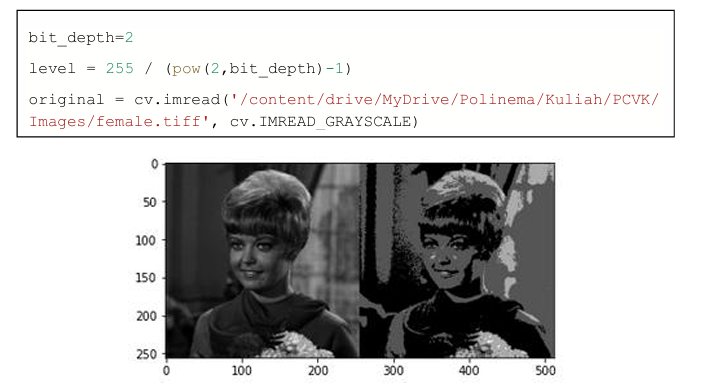

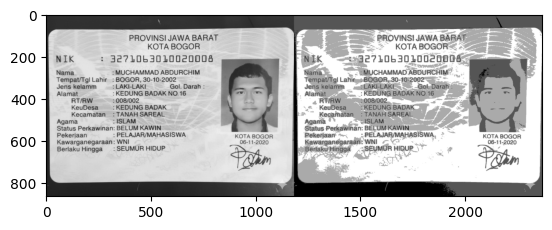

In [27]:
bit_depth = 2
level = 255 /(pow(2,bit_depth) - 1)
original = cv2.imread('/content/KTP_OHIM.png', cv2.IMREAD_GRAYSCALE)
quantized = np.round(original / level) * level
quantized = quantized.astype(np.uint8)
concated = cv2.hconcat([original, quantized])
img = cv2.cvtColor(concated, cv2.COLOR_GRAY2RGB)
plt.imshow(img)

3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.  
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

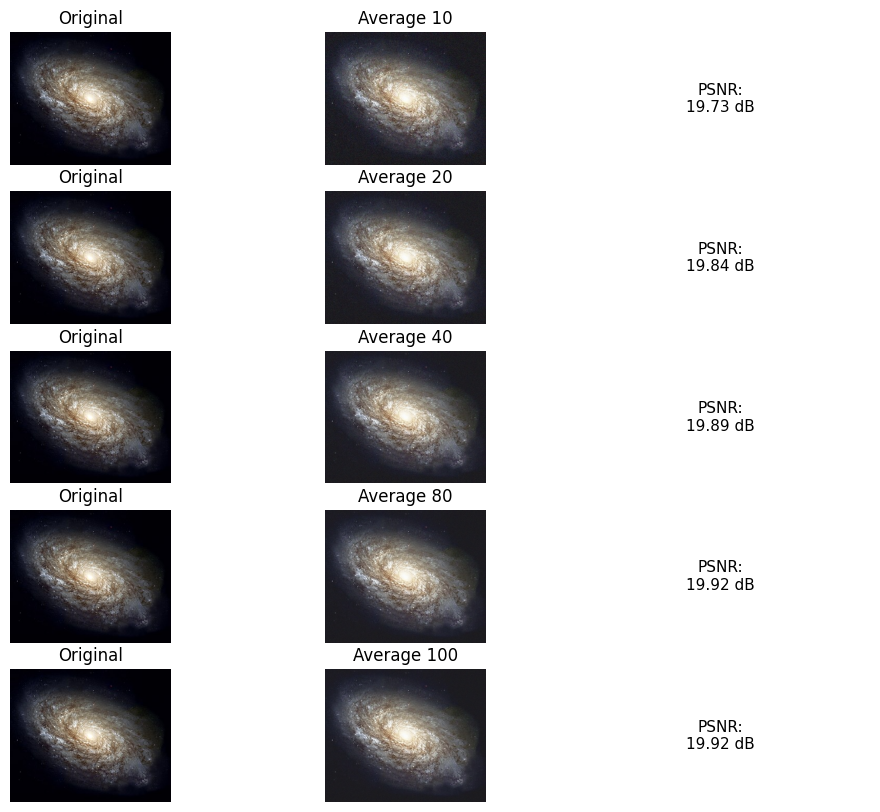

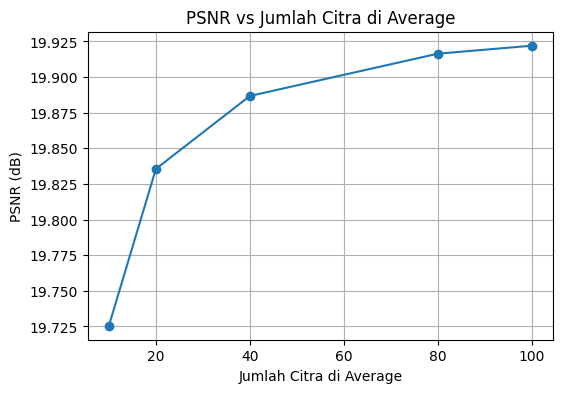

In [28]:
import glob
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

img_bgr = cv2.imread("/content/drive/MyDrive/PCVK/Images/galaxy.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

averages = [10, 20, 40, 80, 100]
psnr_values = []

fig, axes = plt.subplots(len(averages), 3, figsize=(12, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.2)

for i, n_img in enumerate(averages):
    stacked = np.zeros_like(cv_img[0], dtype=np.float32)
    for j in range(n_img):
        stacked += cv_img[j].astype(np.float32)
    avg_img = stacked / n_img
    avg_img = np.uint8(np.clip(avg_img, 0, 255))

    avg_rgb = cv2.cvtColor(avg_img, cv2.COLOR_BGR2RGB)
    value_psnr = psnr(img_bgr, avg_img)
    psnr_values.append(value_psnr)

    axes[i,0].imshow(img_rgb)
    axes[i,0].set_title("Original")
    axes[i,0].axis("off")

    axes[i,1].imshow(avg_rgb)
    axes[i,1].set_title(f"Average {n_img}")
    axes[i,1].axis("off")

    axes[i,2].text(0.5, 0.5, f"PSNR:\n{value_psnr:.2f} dB",
                   ha="center", va="center", fontsize=11)
    axes[i,2].set_axis_off()

plt.show()

plt.figure(figsize=(6,4))
plt.plot(averages, psnr_values, marker="o")
plt.title("PSNR vs Jumlah Citra di Average")
plt.xlabel("Jumlah Citra di Average")
plt.ylabel("PSNR (dB)")
plt.grid(True)
plt.show()

- Kesimpulan makin bagus jumlah citra average maka akan memiliki nilai PSNR yang bagus pula, hal ini ditunjukan dalam grafik diatas dimana nilai jumlah citra sangat berpengaruh pada PSNR

4. Buat image masking

Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:
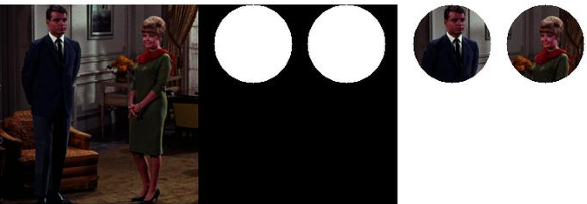

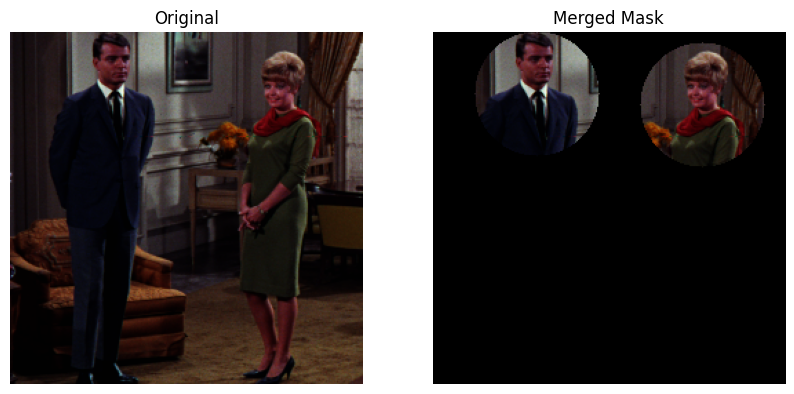

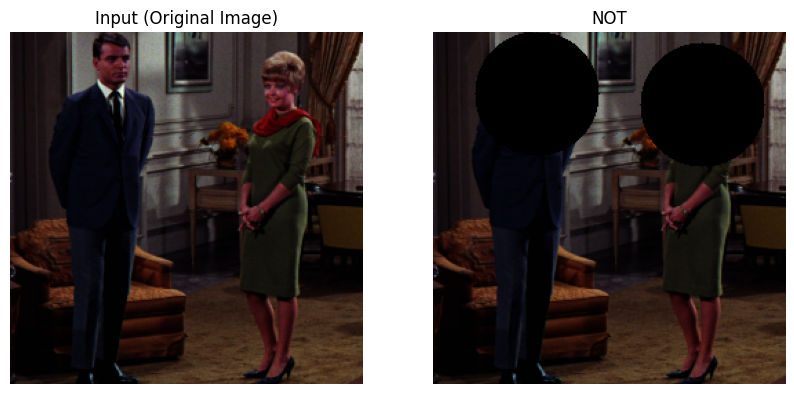

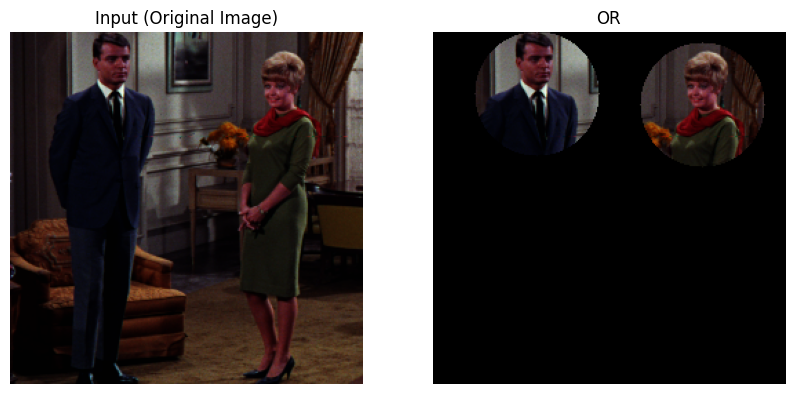

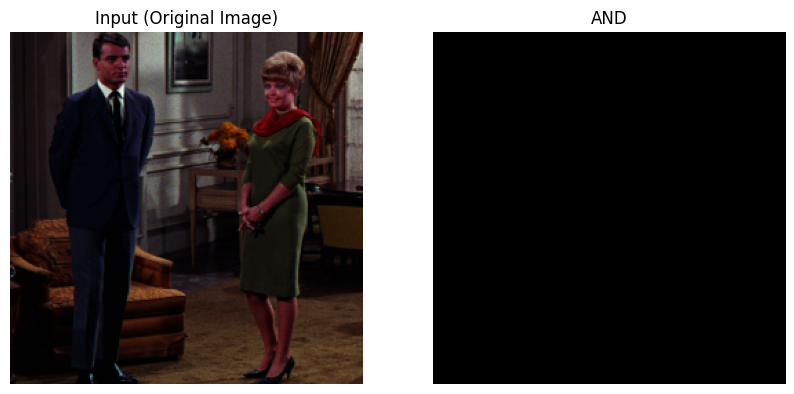

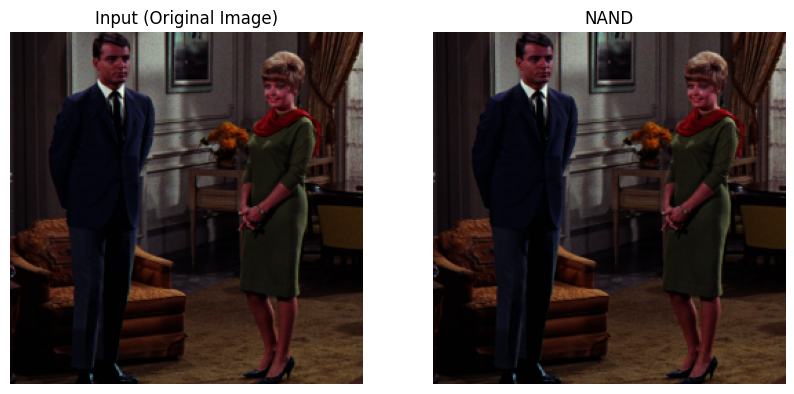

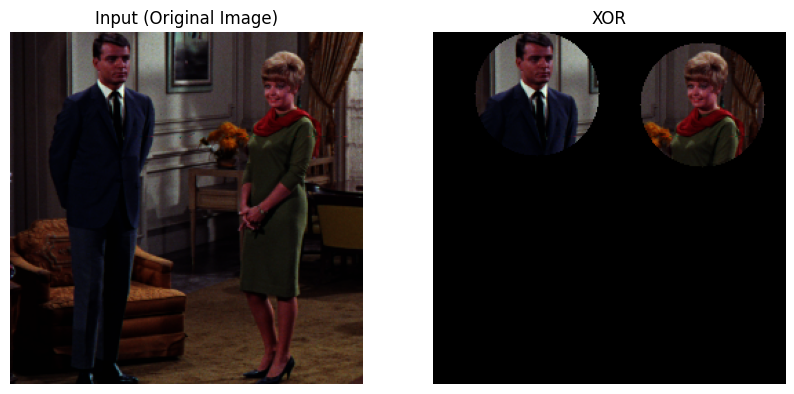

In [29]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask1 = np.zeros(img.shape[:2], dtype=np.uint8)
mask2 = np.zeros(img.shape[:2], dtype=np.uint8)

center1 = (75, 45)
center2 = (195, 53)
radius = 45

cv2.circle(mask1, center1, radius, 255, -1)
cv2.circle(mask2, center2, radius, 255, -1)

merged_bin = cv2.bitwise_or(mask1, mask2)
merged_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=merged_bin)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img_rgb), plt.title("Original"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(merged_rgb), plt.title("Merged Mask"), plt.axis("off")
plt.show()

not_bin = cv2.bitwise_not(merged_bin)
not_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=not_bin)

or_bin = cv2.bitwise_or(mask1, mask2)
or_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=or_bin)

and_bin = cv2.bitwise_and(mask1, mask2)
and_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=and_bin)

nand_bin = cv2.bitwise_not(and_bin)
nand_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=nand_bin)

xor_bin = cv2.bitwise_xor(mask1, mask2)
xor_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=xor_bin)

def show_operation(title, output_img):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1), plt.imshow(img_rgb), plt.title("Input (Original Image)"), plt.axis("off")
    plt.subplot(1,2,2), plt.imshow(output_img), plt.title(title), plt.axis("off")
    plt.show()
show_operation("NOT", not_rgb)
show_operation("OR", or_rgb)
show_operation("AND", and_rgb)
show_operation("NAND", nand_rgb)
show_operation("XOR", xor_rgb)

Kesimpulannya : </br>
NOT = Membalik area mask (area yang tadinya terseleksi menjadi tidak, dan sebaliknya).

OR = Menggabungkan semua area dari kedua mask, sehingga hasilnya menampilkan gabungan lingkaran 1 dan 2.

AND = Hanya menampilkan irisan/overlap dari kedua lingkaran.

NAND = Kebalikan dari AND, yaitu semua area kecuali irisan ditampilkan.

XOR = Menampilkan area yang tidak beririsan (hanya bagian unik dari lingkaran 1 atau 2 saja).